In [1]:
import numpy as np
import pandas as pd
%matplotlib inline 
from matplotlib import pyplot as plt
import seaborn as sns


In [496]:
housing = pd.read_csv('housing_w_demo_features.csv', index_col=0)
housing = housing.drop_duplicates()
housing.shape

(2529, 94)

In [497]:
def ranker(col):
    x = []
    for i in col:
        if i == 'Ex':
            x.append(5)
        elif i == 'Gd':
            x.append(4)
        elif i == 'TA':
            x.append(3)
        elif i == 'Fa':
            x.append(2)
        elif i == 'Po':
            x.append(1)
        else:
            x.append(0)
    return x

In [498]:
housing['LotFrontage'] = housing['LotFrontage'].fillna(0) 
housing['MasVnrType'] = housing['MasVnrType'].fillna('None') 
housing['MasVnrArea'] = housing['MasVnrArea'].fillna(0) 
housing['GarageCars'] = housing['GarageCars'].fillna(0)
housing['GarageArea'] = housing['GarageArea'].fillna(0)
housing['GarageYrBlt'] = housing['GarageYrBlt'].fillna('None')
housing['GarageFinish'] = housing['GarageFinish'].fillna('None')
housing['GarageType'] = housing['GarageType'].fillna('None')
housing['GarageQual'] = housing['GarageQual'].fillna('None')
housing['GarageCond'] = housing['GarageCond'].fillna('None')
housing['BsmtExposure'] = housing['BsmtExposure'].fillna('None')
housing['BsmtCond'] = housing['BsmtCond'].fillna('None')
housing['BsmtQual'] = housing['BsmtQual'].fillna('None')
housing['BsmtFinType1'] = housing['BsmtFinType1'].fillna('None')
housing['TotalBath'] = housing['FullBath'] + (housing['HalfBath']*.5)
housing['BsmtFullBath'] = housing['BsmtFullBath'].fillna(0)
housing['BsmtFinSF1'] = housing['BsmtFinSF1'].fillna(0)
housing['BsmtFinType2'] = housing['BsmtFinType2'].fillna('Unf')
housing['BsmtUnfSF'] = housing['BsmtUnfSF'].fillna(0) 
housing['TotalBsmtSF'] = housing['TotalBsmtSF'].fillna(0)
housing['FireplaceQu'] = housing['FireplaceQu'].fillna('None')
housing['MSSubClass'] = housing['MSSubClass'].astype(str)
housing['KitchenQual'] = ranker(housing['KitchenQual'])
housing['BsmtQual'] = ranker(housing['BsmtQual'])
housing['ExterQual'] = ranker(housing['ExterQual'])
housing['HeatingQC'] = ranker(housing['HeatingQC'])
housing['GarageQual'] = ranker(housing['GarageQual'])
housing['FireplaceQu'] = ranker(housing['FireplaceQu'])

# housing = housing.drop(labels= ['PoolQC', 'MiscFeature', 'Alley', 'Fence','BsmtHalfBath', 'YrSold', 'MoSold',
#                                 'FullBath','HalfBath', 'Condition2', 'BsmtFinSF2','Electrical', 'Utilities',
#                                 'RoofStyle', 'RoofMatl','MasVnrArea', 'BsmtCond', 'BsmtExposure', 'BsmtFinType2',
#                                'BsmtFinType2',  'Heating', 'GarageYrBlt', 'SaleCondition',
#                                'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
#                                'total', 'white', 'asian', 'black','native_am', 'nhopi', 'other',
#                                 'bi_racial', 'ScreenPorch', 'ExterCond', 'KitchenAbvGr',
#                                '1stFlrSF', '2ndFlrSF', 'GarageCond', 'PoolArea',
#                                'Street','PavedDrive', 'TotRmsAbvGrd','BsmtFullBath',
#                                'BsmtHalfBath', 'MiscVal', 'CentralAir', 'Functional', 'HouseStyle',
#                                'MasVnrType', 'Exterior1st', 'Exterior2nd', 'Foundation','TotalBath',
#                                'hispanic', 'median_hh_income', 'BsmtFinType1',
#                                 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF','OverallCond',
#                                'LowQualFinSF','GarageType', 'GarageCars','GarageFinish'], axis=1)


In [499]:
solo_cups = housing.loc[housing['is_collegetown'] == 1]
y1 = solo_cups['SalePrice']
solo_cups = solo_cups.drop(labels = ['SalePrice', 'PID', 'is_collegetown'], axis =1)
old_people = housing.loc[housing['is_collegetown'] == 0]
y2 = old_people['SalePrice']
old_people = old_people.drop(labels = ['SalePrice', 'PID', 'is_collegetown'], axis =1)

In [500]:
solo_cups = solo_cups[['GrLivArea', 'MSSubClass', 'LotFrontage', 'LotArea', 'LotShape',
       'LotConfig', 'Condition1', 'YearRemodAdd', 'ExterQual',
       'BsmtQual', 'HeatingQC', 'BedroomAbvGr', 'KitchenQual', 'FireplaceQu',
       'GarageArea', 'GarageQual', 'age_18_24','median_hh_income','TotalBath','Neighborhood']]
old_people = old_people[['GrLivArea', 'MSSubClass', 'LotFrontage', 'LotArea', 'LotShape',
       'LotConfig', 'Condition1', 'YearRemodAdd', 'ExterQual',
       'BsmtQual', 'HeatingQC', 'BedroomAbvGr', 'KitchenQual', 'FireplaceQu',
       'GarageArea', 'GarageQual', 'age_18_24','median_hh_income','TotalBath','Neighborhood']]

In [501]:
X1 = pd.get_dummies(solo_cups, drop_first=True, dummy_na=True) #solo_cups
X2 = pd.get_dummies(old_people, drop_first=True, dummy_na=True) #old_people

In [502]:
from sklearn.model_selection import train_test_split

#solo cups
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)
#old people
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [503]:
X1_train.shape

(503, 57)

### Solo Cups

In [504]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
lasso1 = Lasso()

In [505]:
lasso1.set_params(alpha=1, normalize=True)
lasso1.fit(X1_train, y1_train)
print('The intercept is %.4f' %(lasso1.intercept_))
lasso1Coef = pd.Series(lasso1.coef_, index=X1_train.columns)
print('The slopes are \n%s' %(lasso1Coef.sort_values()))
lasso1.score(X1_train, y1_train)

The intercept is -517371.1821
The slopes are 
MSSubClass_150         -67431.148998
Neighborhood_OldTown   -53776.058690
Neighborhood_IDOTRR    -44303.146069
MSSubClass_160         -40648.102953
age_18_24              -37898.550128
LotConfig_FR3          -24706.863945
MSSubClass_180         -23371.927734
Neighborhood_Edwards   -20389.796450
Neighborhood_SWISU     -19218.245222
Condition1_PosN        -19040.768946
LotConfig_FR2          -17761.182256
Neighborhood_CollgCr   -14120.053623
Neighborhood_Mitchel   -12421.837764
Neighborhood_Sawyer     -7716.501298
BedroomAbvGr            -7567.649617
Condition1_Feedr        -7449.166211
Neighborhood_MeadowV    -6817.567277
LotConfig_Inside        -5373.030233
MSSubClass_45           -4169.427806
LotShape_Reg            -2962.295896
MSSubClass_60            -877.030069
GarageQual               -296.911990
LotFrontage               -28.194092
median_hh_income           -0.227290
MSSubClass_nan              0.000000
LotConfig_nan               0

0.8290902602584627

In [506]:
coefs = []
intercepts = []
R2  = []
alphaRange = np.linspace(1e-4,200,20)
for alpha in alphaRange:
    lasso1.set_params(alpha=alpha, normalize = True)  
    lasso1.fit(X1_train, y1_train)
    intercepts.append(lasso1.intercept_)
    coefs.append(lasso1.coef_)
    R2.append(lasso1.score(X1_train, y1_train))

Text(0.5, 1.0, 'Change of Lasso Slopes Varying Alpha')

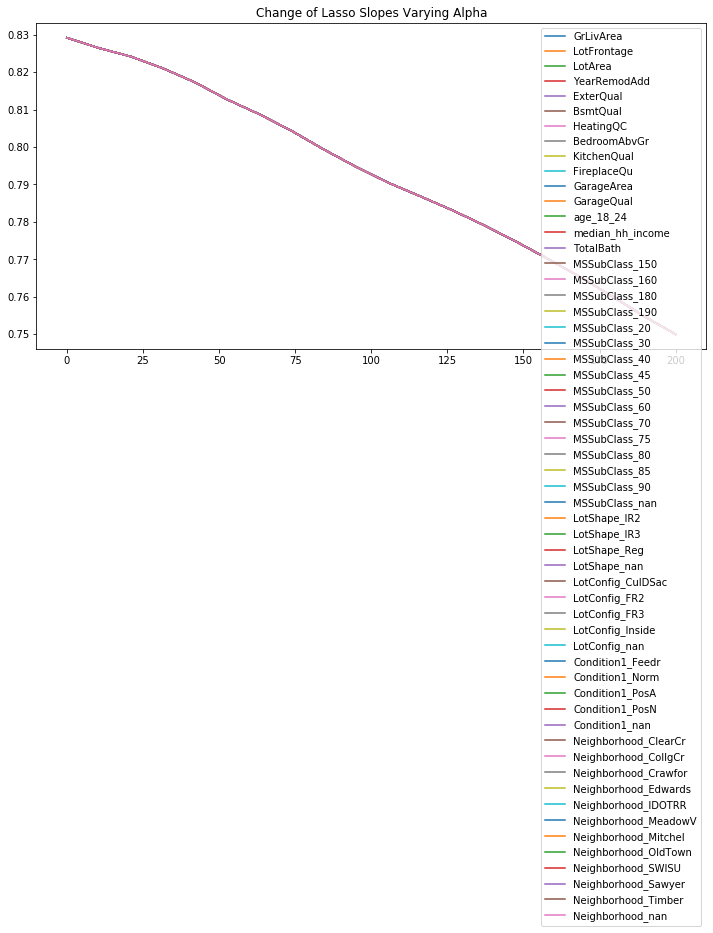

In [507]:
coefs = pd.DataFrame(np.array(coefs), columns=X1.columns)
plt.figure(figsize=(12,6))

for name in coefs.columns:
    plt.plot(alphaRange, R2, label=name)
    #plt.plot(alphaRange, coefs[name], label=name)

plt.legend(loc=1)    
plt.title('Change of Lasso Slopes Varying Alpha')

In [508]:
pd.set_option('display.max_columns', None)
coefs

,GrLivArea,LotFrontage,LotArea,YearRemodAdd,ExterQual,BsmtQual,HeatingQC,BedroomAbvGr,KitchenQual,FireplaceQu,GarageArea,GarageQual,age_18_24,median_hh_income,TotalBath,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_nan,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotShape_nan,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LotConfig_nan,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_nan,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_Timber,Neighborhood_nan
0,55.919073,-32.544108,0.653746,248.017641,21582.672477,8688.783021,5217.685854,-7738.714464,4134.147754,2513.985750,21.134317,-307.428125,-39597.462719,-0.256313,7429.622202,-67464.336502,-41148.592900,-23565.250455,5323.221460,12863.008029,9978.360801,11054.407941,-2528.612044,5490.055952,769.839616,16729.258222,8356.25832,20286.494495,11718.520789,4654.077554,0.0,8318.516209,16565.075908,-2809.375068,0.0,-295.681517,-17469.486950,-23806.127371,-5445.143402,0.0,-7722.552619,13402.227104,11364.618646,-20003.084781,0.0,949.845295,-18175.174363,3827.272451,-24629.505780,-49138.959421,-8589.342076,-16231.934717,-58858.171147,-23595.692687,-11001.189581,25984.710330,0.0
1,53.557739,-7.863974,0.669064,245.124009,20204.049056,8567.873526,4691.042420,-6832.301527,4494.069319,2915.218158,21.702553,-0.000000,-25053.253442,-0.000000,6981.480092,-58375.629365,-35303.132892,-19485.794383,-897.574994,6553.863347,1382.775915,5094.212954,-4037.086111,-1574.293593,-2803.328870,8176.362398,0.00000,12177.080997,4499.996874,-39.655439,0.0,6081.641176,9586.148836,-4318.741094,0.0,583.222263,-15336.041620,-22265.898342,-4696.308385,0.0,-6413.872966,13104.662916,7352.908332,-13195.185164,0.0,15996.210347,-0.000000,22109.766689,-3640.169073,-23347.292326,-385.949964,-0.000000,-32127.040905,-2736.370758,0.000000,38699.183332,0.0
2,51.942414,-0.000000,0.712574,248.378097,19995.278891,8430.712163,4410.130321,-6008.588473,4864.506610,3039.235038,22.630905,0.000000,-22756.277448,0.000000,6117.342177,-49485.562502,-32960.868790,-16414.756277,-1054.028490,6187.662571,0.000000,1937.327192,-279.375197,-2206.187912,-1010.820305,6007.037446,0.00000,10500.656301,3980.512580,-0.000000,0.0,3661.729936,2685.602153,-5042.718398,0.0,411.148768,-10962.943430,-14369.919722,-3846.571885,0.0,-5255.009601,12923.807121,3385.861345,-7746.051871,0.0,15784.753335,-0.000000,22817.347300,-2672.232183,-20671.128102,-204.513592,0.000000,-28550.369746,-933.160771,0.000000,36659.576405,0.0
3,50.577749,-0.000000,0.753061,250.469326,19892.436342,8319.271386,4131.557550,-5117.782827,5205.578466,3154.977935,23.643521,0.000000,-20474.158490,0.000000,5401.799996,-41286.903124,-30962.348569,-13351.194448,-1007.419685,5919.851522,-0.000000,0.000000,-0.000000,-2572.968445,-0.000000,4010.162204,-0.00000,8920.150117,3473.975812,-0.000000,0.0,1257.289361,0.000000,-5560.815059,0.0,81.883874,-6898.282573,-6103.032672,-3099.340909,0.0,-4250.638029,12625.448185,0.000000,-2543.871680,0.0,15343.014147,-0.000000,23153.997554,-1987.538247,-18289.559660,-139.739472,0.000000,-25500.214648,-0.000000,0.000000,34529.307880,0.0
4,49.316734,-0.000000,0.781839,252.012594,19747.448073,8215.642616,3899.013917,-4191.500175,5511.367351,3275.260470,24.725798,0.000000,-17682.460762,0.003987,4750.687475,-33418.185512,-29316.177710,-10463.569679,-1078.855109,5300.574867,-0.000000,0.000000,-0.000000,-3062.436011,-0.000000,1865.387204,-0.00000,7048.832036,2531.627977,-0.000000,0.0,0.000000,0.000000,-6020.050033,0.0,0.000000,-3276.033190,-0.000000,-2379.711729,0.0,-3185.249603,12302.898684,0.000000,-0.000000,0.0,14753.419996,-0.000000,23099.714956,-1502.197876,-16145.410026,-259.27351

In [509]:
from sklearn.model_selection import cross_val_score

print(np.sqrt(-1* cross_val_score(lasso, X1_train, y1_train, cv=5, scoring='neg_mean_squared_error', n_jobs =-1)))


[32425.44121198 23005.13316825 20427.83673107 26143.52575679
 26721.79148685]


In [16]:
print(np.sqrt(-1* cross_val_score(lasso, X1_train, y1_train, cv=5, scoring='neg_mean_squared_error', n_jobs =-1)))

[34086.87875304 24138.15560382 19156.42210371 27158.98736266
 22814.86717589]


In [43]:
print(np.sqrt(-1* cross_val_score(lasso, X1_train, y1_train, cv=5, scoring='neg_mean_squared_error', n_jobs =-1)))

[35913.51817325 25409.00673222 18699.1713724  27143.9078912
 23552.62910606]


In [125]:
print(np.sqrt(-1* cross_val_score(lasso, X1_train, y1_train, cv=5, scoring='neg_mean_squared_error', n_jobs =-1)))

[36838.05393542 27836.07558087 19445.44552015 28749.42365858
 27270.1421486 ]


In [137]:
print(np.sqrt(-1* cross_val_score(lasso, X1_train, y1_train, cv=5, scoring='neg_mean_squared_error', n_jobs =-1)))

[32104.3587125  23019.42912911 20975.72806593 25069.49453581
 27058.71437504]


In [176]:
print(np.sqrt(-1* cross_val_score(lasso, X1_train, y1_train, cv=5, scoring='neg_mean_squared_error', n_jobs =-1)))

[32266.29311441 22585.7947577  21801.48820777 25121.80805589
 27948.76233646]


In [189]:
print(np.sqrt(-1* cross_val_score(lasso, X1_train, y1_train, cv=5, scoring='neg_mean_squared_error', n_jobs =-1)))

[36856.52114179 27732.4745767  19491.3903368  29663.37475374
 27241.10866111]


In [210]:
print(np.sqrt(-1* cross_val_score(lasso, X1_train, y1_train, cv=5, scoring='neg_mean_squared_error', n_jobs =-1)))

[38135.8744401  28094.95002846 20504.04718789 30671.98223904
 27873.1838661 ]


In [306]:
print(np.sqrt(-1* cross_val_score(lasso1, X1_train, y1_train, cv=5, scoring='neg_mean_squared_error', n_jobs =-1)))

[38135.8744401  28094.95002846 20504.04718789 30671.98223904
 27873.1838661 ]


## Old People

In [510]:
lasso2 = Lasso()

In [511]:
lasso2.set_params(alpha=1, normalize=True)
lasso2.fit(X2_train, y2_train)
print('The intercept is %.4f' %(lasso2.intercept_))
lasso2Coef = pd.Series(lasso2.coef_, index=X2_train.columns)
print('The slopes are \n%s' %(lasso2Coef.sort_values()))
lasso2.score(X2_train, y2_train)

The intercept is -322746.8827
The slopes are 
MSSubClass_160         -23720.928109
Neighborhood_SawyerW   -17569.410267
Neighborhood_OldTown   -15097.043698
LotShape_IR3           -14614.626454
Neighborhood_IDOTRR    -13697.260951
BedroomAbvGr           -10494.072331
Neighborhood_ClearCr   -10384.043047
Condition1_RRAe         -9644.378155
Neighborhood_NWAmes     -8766.887068
Neighborhood_NAmes      -8321.035228
Condition1_RRNn         -7813.042784
Neighborhood_Veenker    -6614.541085
Neighborhood_CollgCr    -5321.915360
Condition1_Feedr        -5056.334532
Neighborhood_Sawyer     -4336.773983
TotalBath               -3342.028454
Neighborhood_Gilbert    -3274.628925
LotConfig_FR2           -3058.537476
GarageQual              -1304.192176
Condition1_RRNe         -1233.116910
MSSubClass_70            -219.843921
Neighborhood_Greens      -192.425317
LotConfig_nan               0.000000
MSSubClass_nan              0.000000
Neighborhood_nan            0.000000
median_hh_income            0

0.8810105043223131

In [512]:
coefs

,GrLivArea,LotFrontage,LotArea,YearRemodAdd,ExterQual,BsmtQual,HeatingQC,BedroomAbvGr,KitchenQual,FireplaceQu,GarageArea,GarageQual,age_18_24,median_hh_income,TotalBath,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_nan,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotShape_nan,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LotConfig_nan,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_nan,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_Timber,Neighborhood_nan
0,55.919073,-32.544108,0.653746,248.017641,21582.672477,8688.783021,5217.685854,-7738.714464,4134.147754,2513.985750,21.134317,-307.428125,-39597.462719,-0.256313,7429.622202,-67464.336502,-41148.592900,-23565.250455,5323.221460,12863.008029,9978.360801,11054.407941,-2528.612044,5490.055952,769.839616,16729.258222,8356.25832,20286.494495,11718.520789,4654.077554,0.0,8318.516209,16565.075908,-2809.375068,0.0,-295.681517,-17469.486950,-23806.127371,-5445.143402,0.0,-7722.552619,13402.227104,11364.618646,-20003.084781,0.0,949.845295,-18175.174363,3827.272451,-24629.505780,-49138.959421,-8589.342076,-16231.934717,-58858.171147,-23595.692687,-11001.189581,25984.710330,0.0
1,53.557739,-7.863974,0.669064,245.124009,20204.049056,8567.873526,4691.042420,-6832.301527,4494.069319,2915.218158,21.702553,-0.000000,-25053.253442,-0.000000,6981.480092,-58375.629365,-35303.132892,-19485.794383,-897.574994,6553.863347,1382.775915,5094.212954,-4037.086111,-1574.293593,-2803.328870,8176.362398,0.00000,12177.080997,4499.996874,-39.655439,0.0,6081.641176,9586.148836,-4318.741094,0.0,583.222263,-15336.041620,-22265.898342,-4696.308385,0.0,-6413.872966,13104.662916,7352.908332,-13195.185164,0.0,15996.210347,-0.000000,22109.766689,-3640.169073,-23347.292326,-385.949964,-0.000000,-32127.040905,-2736.370758,0.000000,38699.183332,0.0
2,51.942414,-0.000000,0.712574,248.378097,19995.278891,8430.712163,4410.130321,-6008.588473,4864.506610,3039.235038,22.630905,0.000000,-22756.277448,0.000000,6117.342177,-49485.562502,-32960.868790,-16414.756277,-1054.028490,6187.662571,0.000000,1937.327192,-279.375197,-2206.187912,-1010.820305,6007.037446,0.00000,10500.656301,3980.512580,-0.000000,0.0,3661.729936,2685.602153,-5042.718398,0.0,411.148768,-10962.943430,-14369.919722,-3846.571885,0.0,-5255.009601,12923.807121,3385.861345,-7746.051871,0.0,15784.753335,-0.000000,22817.347300,-2672.232183,-20671.128102,-204.513592,0.000000,-28550.369746,-933.160771,0.000000,36659.576405,0.0
3,50.577749,-0.000000,0.753061,250.469326,19892.436342,8319.271386,4131.557550,-5117.782827,5205.578466,3154.977935,23.643521,0.000000,-20474.158490,0.000000,5401.799996,-41286.903124,-30962.348569,-13351.194448,-1007.419685,5919.851522,-0.000000,0.000000,-0.000000,-2572.968445,-0.000000,4010.162204,-0.00000,8920.150117,3473.975812,-0.000000,0.0,1257.289361,0.000000,-5560.815059,0.0,81.883874,-6898.282573,-6103.032672,-3099.340909,0.0,-4250.638029,12625.448185,0.000000,-2543.871680,0.0,15343.014147,-0.000000,23153.997554,-1987.538247,-18289.559660,-139.739472,0.000000,-25500.214648,-0.000000,0.000000,34529.307880,0.0
4,49.316734,-0.000000,0.781839,252.012594,19747.448073,8215.642616,3899.013917,-4191.500175,5511.367351,3275.260470,24.725798,0.000000,-17682.460762,0.003987,4750.687475,-33418.185512,-29316.177710,-10463.569679,-1078.855109,5300.574867,-0.000000,0.000000,-0.000000,-3062.436011,-0.000000,1865.387204,-0.00000,7048.832036,2531.627977,-0.000000,0.0,0.000000,0.000000,-6020.050033,0.0,0.000000,-3276.033190,-0.000000,-2379.711729,0.0,-3185.249603,12302.898684,0.000000,-0.000000,0.0,14753.419996,-0.000000,23099.714956,-1502.197876,-16145.410026,-259.27351

In [174]:
print(np.sqrt(-1* cross_val_score(lasso, X2_train, y2_train, cv=5, scoring='neg_mean_squared_error', n_jobs =-1)))

[32297.99476094 26414.09011606 28092.92976054 26949.51844443
 26475.93022638]


In [192]:
print(np.sqrt(-1* cross_val_score(lasso, X2_train, y2_train, cv=5, scoring='neg_mean_squared_error', n_jobs =-1)))

[32348.19126363 26385.85331587 28171.61640174 27017.51038314
 26475.69884904]


In [231]:
print(np.sqrt(-1* cross_val_score(lasso, X2_train, y2_train, cv=5, scoring='neg_mean_squared_error', n_jobs =-1)))

[33780.93618435 29151.94616065 31131.07219842 30030.43639807
 28195.42617055]


In [286]:
print(np.sqrt(-1* cross_val_score(lasso2, X2_train, y2_train, cv=5, scoring='neg_mean_squared_error', n_jobs =-1)))

[1.14735004 1.18686178 1.11901872 1.12915246 1.14461009]


In [513]:
print(np.sqrt(-1* cross_val_score(lasso2, X2_train, y2_train, cv=5, scoring='neg_mean_squared_error', n_jobs =-1)))

[32526.81096867 26388.53766782 28265.29574956 26829.74323187
 26585.27360328]


## Validating on Test Data

In [514]:
lasso1.score(X1_test, y1_test)

0.6433448688526353

In [515]:
comp = list(zip(lasso1.predict(X1_test),y1_test))
l=[]
for i in comp:
    l.append(abs(i[0]-i[1]))
np.mean(l)

19055.036379314333

In [516]:
lasso2.score(X2_test, y2_test)

0.8809335770684938

## Comparing Coeficients SoloCups vs Old People

In [517]:
pd.set_option('display.max_rows', None)
lasso1Coef
lasso2Coef.values

array([ 8.87576471e+01,  7.18802420e+01,  7.39880957e-01,  1.08984884e+02,
        1.49595852e+04,  1.21382182e+04,  1.31288184e+03, -1.04940723e+04,
        1.18886268e+04,  1.52945347e+03,  3.15648498e+01, -1.30419218e+03,
        3.91842157e+04,  0.00000000e+00, -3.34202845e+03, -2.37209281e+04,
        1.04253142e+04,  3.48144754e+04,  1.54882544e+04,  3.67865006e+03,
        2.45587493e+04,  5.40248385e+03,  1.01215225e+04, -2.19843921e+02,
        1.61435230e+04,  2.67507958e+04,  3.31871167e+04,  1.27723333e+04,
        0.00000000e+00,  3.16356646e+03, -1.46146265e+04,  7.09530503e+02,
        0.00000000e+00,  7.53274944e+03, -3.05853748e+03,  4.15479475e+03,
        1.58983058e+03,  0.00000000e+00, -5.05633453e+03,  2.18706021e+03,
        1.34252490e+04,  1.72615795e+04, -9.64437815e+03,  5.02883082e+02,
       -1.23311691e+03, -7.81304278e+03,  0.00000000e+00,  2.76482873e+04,
        6.16069836e+02, -1.03840430e+04, -5.32191536e+03, -3.27462892e+03,
       -1.92425317e+02, -

In [518]:
solo_cups_coef = pd.DataFrame(lasso1Coef)
old_people_coef = pd.DataFrame(lasso2Coef)

coef_comparisson = solo_cups_coef.merge(old_people_coef, left_index=True, right_on=old_people_coef.index)
coef_comparisson.columns = ['Feature', 'college-age', 'non-college-age']
coef_comparisson.set_index('Feature', inplace=True)

In [519]:
coef_comparisson = coef_comparisson.T

quality_rename = ({ 'ExterQual' : 'Exterior',
  'BsmtQual' : 'Basement',
  'HeatingQC' : 'Heating',
  'KitchenQual' : 'Kitchen',
  'FireplaceQu' : 'Fireplace',
})

quality = list(quality_rename.values())

coef_comparisson = coef_comparisson.rename(columns = quality_rename)

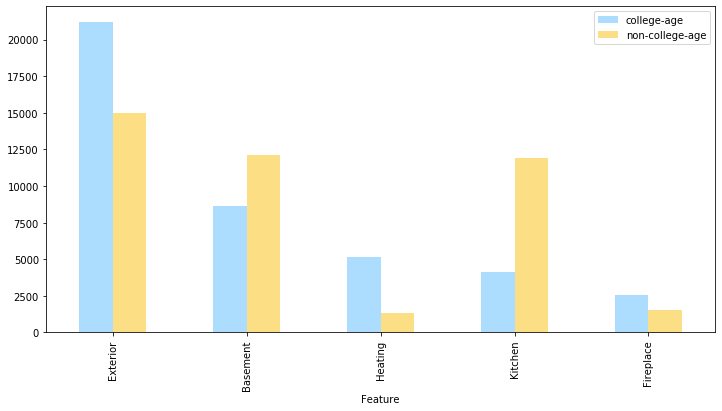

In [520]:
coef_comparisson[quality].T.plot(kind='bar',color=['#ADDDFE', '#FCDE85'],
                                  figsize=(12,6))

In [521]:
coef_comparisson

Feature,GrLivArea,LotFrontage,LotArea,YearRemodAdd,Exterior,Basement,Heating,BedroomAbvGr,Kitchen,Fireplace,GarageArea,GarageQual,age_18_24,median_hh_income,TotalBath,MSSubClass_160,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_nan,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotShape_nan,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LotConfig_nan,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_nan,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_IDOTRR,Neighborhood_OldTown,Neighborhood_Sawyer,Neighborhood_Timber,Neighborhood_nan
college-age,55.746790,-28.194092,0.656344,246.446505,21209.184905,8650.772703,5121.239106,-7567.649617,4122.653347,2559.798073,21.132336,-296.911990,-37898.550128,-0.22729,7423.607050,-40648.102953,2761.341040,10883.601022,7718.759037,9503.018537,-4169.427806,3155.922617,-877.030069,14378.451910,5816.176786,18080.931033,9622.214037,2382.515289,0.0,8260.166482,15836.138623,-2962.295896,0.0,0.000000,-17761.182256,-24706.863945,-5373.030233,0.0,-7449.166211,13454.101422,10910.027106,-19040.768946,0.0,4511.371772,-14120.053623,-44303.146069,-53776.058690,-7716.501298,28809.670046,0.0
non-college-age,88.757647,71.880242,0.739881,108.984884,14959.585181,12138.218178,1312.881838,-10494.072331,11888.626801,1529.453469,31.564850,-1304.192176,39184.215691,0.00000,-3342.028454,-23720.928109,10425.314244,34814.475352,15488.254351,3678.650065,24558.749252,5402.483847,10121.522507,-219.843921,16143.522973,26750.795845,33187.116706,12772.333330,0.0,3163.566462,-14614.626454,709.530503,0.0,7532.749441,-3058.537476,4154.794746,1589.830584,0.0,-5056.334532,2187.060212,13425.249016,17261.579503,0.0,-10384.043047,-5321.915360,-13697.260951,-15097.043698,-4336.773983,0.000000,0.0
